# Import the dataset and explore the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
sns.set()

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE

#scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# embedded methods
from sklearn.linear_model import LassoCV

from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [2]:
#First Hearing Date: blank means no hearing yet, can we input? I think not
#Agreement Reached: Can't input
#WCB Decision: Can't input

#test data don't have Agreement Reached, WCB Decision and Claim Injury Type (this one make sense)

In [3]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')
#what does this warning mean?

C:\Users\HP\AppData\Local\Temp\ipykernel_3104\3913529062.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train_data.csv')


In [4]:
pd.set_option('display.max_columns', None) #to display all columns
train_data.head()
#Claim Identifier: should be the first column
#Claim Injury Type: should be the last column
#line 3 just have the claim identifier and assemble date, we should delete it

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [5]:
train_data.shape

(593471, 33)

In [6]:
train_data.info()
#OIICS Nature of Injury Description: no data
#IME-4 Count: Few info, just for who has an attorney? maybe we should delete for modeling purposes
#C-3 Date: very few values 1/5 of the data

#Industry Code, WCIO Cause of Injury Code, WCIO Nature of Injury Code and WCIO Part Of Body Code should be categorical
#Agreement Reached, Age at Injury, Birth Year and Number of Dependents should be int?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [7]:
train_data.describe()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,IME-4 Count,Industry Code,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574026.000000,5.453750e+05,544948.000000,5.934710e+05,132803.000000,564068.000000,0.0,558386.000000,558369.000000,556944.000000,574026.000000,574026.000000
mean,42.114270,4.910883e+02,1886.767604,2.366760e+07,3.207337,58.645305,NaN,54.381143,41.013839,39.738146,0.046665,3.006559
std,14.256432,6.092918e+03,414.644423,1.079271e+08,2.832303,19.644175,NaN,25.874281,22.207521,22.365940,0.210921,2.000801
min,0.000000,0.000000e+00,0.000000,5.393066e+06,1.000000,11.000000,NaN,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,5.593414e+06,1.000000,45.000000,NaN,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,5.791212e+06,2.000000,61.000000,NaN,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,5.991000e+06,4.000000,71.000000,NaN,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,9.998917e+08,73.000000,92.000000,NaN,99.000000,91.000000,99.000000,1.000000,6.000000


In [8]:
train_data.describe(include=['object'])

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574026,593471,574026,559466,187245,574026,574026,574026,574026,574026,574026,150798,574026,564068,574026,558386,558369,556944,545389,574026
unique,5539,3,1096,2,2475,1648,2046,8,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571412,1422,392291,1847,350,111144,285368,291078,60430,546505,270779,440,335218,114339,265981,46610,153373,51862,3302,574026


In [9]:
columns_name = train_data.columns
columns_name

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [10]:
for i in columns_name:
    print(i)
    print(train_data[i].unique())
    print(train_data[i].value_counts())
    print('\n')
#Age at Injury: if it's a workplace it means ages like 5 or 9 don't make sense, we should delete them
#Birth Year: with a lot of 0.0
#Claim Identifier: 292668076 is repeated
#Zip Code: 'G9B0Y' is an error?
#WCB Decision: just 'Not Work Related' and 'nan'? maybe we can delete this column

#maybe 0.0 it's a nan, some values we don't have, but exists
#Carrier Type: we have a lot of UNKNOW, so maybe we can conclude 0.0 or nothing mean missing values

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  nan  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.
  54.  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.
  58.  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.
  27.  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.
  68.  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.
  87.  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.
  14. 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.
  93. 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     

In [11]:
train_data.isna().sum()

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

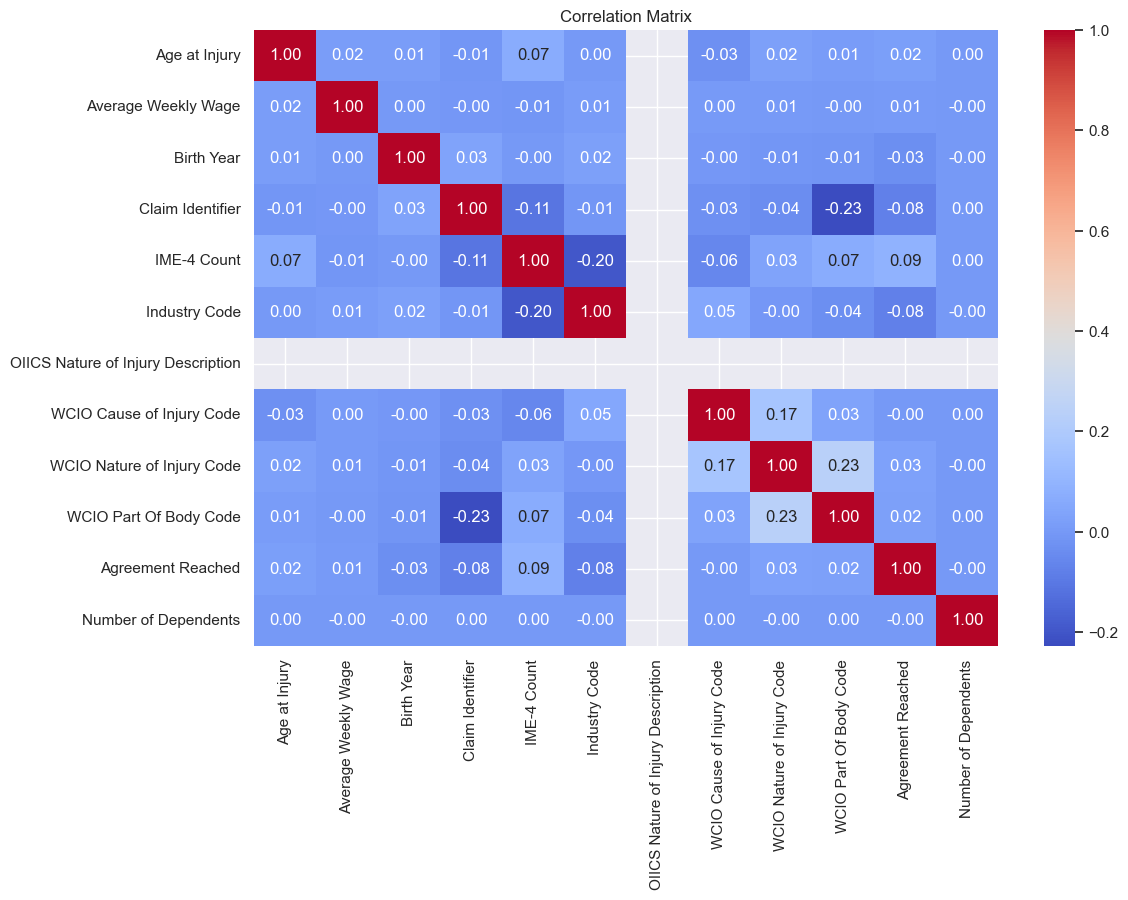

In [12]:
numeric_cols = train_data.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = train_data[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Clean and pre-process the dataset

In [13]:
train_data.shape[0] #number of rows, the same as Claim Identifier

593471

In [14]:
train_data.set_index('Claim Identifier', inplace=True) #set Claim Identifier as index
test_data.set_index('Claim Identifier', inplace=True)

In [15]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
957648180,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


In [16]:
train_data[train_data.index == 292668076] #to delete, no info and duplicate

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
292668076,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292668076,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.drop(292668076, inplace=True) #delete the rows
train_data.drop(['OIICS Nature of Injury Description', 'WCB Decision', 'Agreement Reached'], axis=1, inplace=True) #delete the column, just nan values or one value
test_data.drop(['OIICS Nature of Injury Description'], axis=1, inplace=True)
#train_data = train_data[(train_data['Age at Injury'] >= 16) & (train_data['Age at Injury'] <= 70)]
#test_data = test_data[(test_data['Age at Injury'] >= 16) & (test_data['Age at Injury'] <= 70)] #can't work if they are younger than 16
train_data.dropna(subset=['Claim Injury Type'], inplace=True) #delete the rows with missing values in Claim Injury Type
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,5.0


In [18]:
# IN INT
train_data['Age at Injury'] = train_data['Age at Injury'].astype('Int64')
train_data['Birth Year'] = train_data['Birth Year'].astype('Int64')
#train_data['Agreement Reached'] = train_data['Agreement Reached'].astype('Int64')
train_data['Number of Dependents'] = train_data['Number of Dependents'].astype('Int64')  

test_data['Age at Injury'] = test_data['Age at Injury'].astype('Int64')
test_data['Birth Year'] = test_data['Birth Year'].astype('Int64')
test_data['Number of Dependents'] = test_data['Number of Dependents'].astype('Int64')

In [19]:
train_data['WCIO Part Of Body Code'] = train_data['WCIO Part Of Body Code'].apply(lambda x: abs(x) if x < 0 else x)
test_data['WCIO Part Of Body Code'] = test_data['WCIO Part Of Body Code'].apply(lambda x: abs(x) if x < 0 else x)

In [20]:
float_to_object = ['Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
train_data[float_to_object] = train_data[float_to_object].astype(str)
test_data[float_to_object] = test_data[float_to_object].astype(str)
train_data.dtypes

Accident Date                         object
Age at Injury                          Int64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                             Int64
C-2 Date                              object
C-3 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
First Hearing Date                    object
Gender                                object
IME-4 Count                          float64
Industry Code                         object
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code             object
WCIO Cause

In [21]:
train_data.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31,N,2020-01-01,N,0.00,1988,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,1
5393091,2019-08-30,46,N,2020-01-01,Y,1745.93,1973,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,4
5393889,2019-12-06,40,N,2020-01-01,N,1434.80,1979,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,6
5393887,2019-12-30,61,N,2020-01-01,N,NaN,1958,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,1
5393863,2019-12-26,67,N,2020-01-01,N,0.00,1952,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,1A. PRIVATE,3. MED ONLY,SUFFOLK,N,HAUPPAUGE,NaN,M,NaN,44.0,RETAIL TRADE,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,5


In [22]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

1
2


In [23]:
train_data.drop_duplicates(inplace=True)
print(train_data.duplicated().sum())

0


In [24]:
#classifiy them as Non-US residents
train_data['Zip Code'] = train_data['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)
test_data['Zip Code'] = test_data['Zip Code'].apply(
    lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else ('Non-US Resident' if pd.notna(x) else np.nan)
)

In [25]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
train_data['Zip Code'] = np.where(
    (train_data['Zip Code'] != 'Unknown') & 
    (train_data['Zip Code'] != 'Non-US Resident') & 
    train_data['Zip Code'].notna() & 
    train_data['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (train_data['Zip Code'] != 'Unknown') & 
        (train_data['Zip Code'] != 'Non-US Resident') & 
        train_data['Zip Code'].notna(), 
        'non-NY US Residents', 
        train_data['Zip Code']
    )
)
test_data['Zip Code'] = np.where(
    (test_data['Zip Code'] != 'Unknown') & 
    (test_data['Zip Code'] != 'Non-US Resident') & 
    test_data['Zip Code'].notna() & 
    test_data['Zip Code'].str.startswith('1'), 
    'NY Resident', 
    np.where(
        (test_data['Zip Code'] != 'Unknown') & 
        (test_data['Zip Code'] != 'Non-US Resident') & 
        test_data['Zip Code'].notna(), 
        'non-NY US Residents', 
        test_data['Zip Code']
    )
)

In [26]:
train_data['Zip Code'].unique()

array(['NY Resident', 'non-NY US Residents', nan, 'Non-US Resident'],
      dtype=object)

### Missing values

In [27]:
train_data = train_data.dropna(thresh=4)
test_data = test_data.dropna(thresh=4)
train_data.isna().sum()

Accident Date                          3688
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14559
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441222
Industry Code                             0
Industry Code Description              9957
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description

In [28]:
test_data.isna().sum()

Accident Date                          2444
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   19204
Birth Year                            19470
C-2 Date                               9134
C-3 Date                             302759
Carrier Name                              0
Carrier Type                              0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   344947
Gender                                    0
IME-4 Count                          352726
Industry Code                             0
Industry Code Description              7736
Medical Fee Region                        0
WCIO Cause of Injury Code                 0
WCIO Cause of Injury Description      10348
WCIO Nature of Injury Code      

Accident Date

In [29]:
train_data['Accident Date'] = train_data['Accident Date'].fillna('2020-03-01')
test_data['Accident Date'] = test_data['Accident Date'].fillna('2020-03-01')

Average Weekly Wage

In [30]:
median_to_fill = train_data['Average Weekly Wage'].median()
train_data['Average Weekly Wage'] = train_data['Average Weekly Wage'].fillna(median_to_fill)
test_data['Average Weekly Wage'] = test_data['Average Weekly Wage'].fillna(median_to_fill)

Birth Year (Diogo)

In [31]:
train_data['Accident Year'] = train_data['Accident Date'].map(lambda x: int(x.split('-')[0]) if x != 'Unknown' else 0)
train_data['Birth_Year_2'] = train_data['Accident Year'] - train_data['Age at Injury']
train_data['Birth Year'] = train_data['Birth Year'].fillna(train_data['Birth_Year_2'])

test_data['Accident Year'] = test_data['Accident Date'].map(lambda x: int(x.split('-')[0]) if x != 'Unknown' else 0)
test_data['Birth_Year_2'] = test_data['Accident Year'] - test_data['Age at Injury']
test_data['Birth Year'] = test_data['Birth Year'].fillna(test_data['Birth_Year_2'])

C-2 Date

In [32]:
train_data['C-2 Date'] = train_data['C-2 Date'].fillna('2021-05-11')
test_data['C-2 Date'] = test_data['C-2 Date'].fillna('2021-05-11')

C-3 Date

In [33]:
train_data.drop(columns=['C-3 Date'], inplace=True)
test_data.drop(columns=['C-3 Date'], inplace=True)

First Hearing Date

In [34]:
train_data['First Hearing Date'] = train_data['First Hearing Date'].fillna('1900-01-01')
test_data['First Hearing Date'] = test_data['First Hearing Date'].fillna('1900-01-01')

IME-4 Count

In [35]:
train_data['IME-4 Count'] = train_data['IME-4 Count'].fillna(0)
test_data['IME-4 Count'] = test_data['IME-4 Count'].fillna(0)

Industry Code Description

In [36]:
industry_code_mapping = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '45': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '49': 'Transportation and Warehousing',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '53': 'Real Estate Rental and Leasing',
    '54': 'Professional, Scientific, and Technical Services',
    '55': 'Management of Companies and Enterprises',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '61': 'Educational Services',
    '62': 'Health Care and Social Assistance',
    '71': 'Arts, Entertainment, and Recreation',
    '72': 'Accommodation and Food Services',
    '81': 'Other Services (except Public Administration)',
    '92': 'Public Administration'
}
train_data['Industry Code Description'] = train_data['Industry Code Description'].astype(str)
train_data['Industry Code Description'].fillna(train_data['Industry Code'].map(industry_code_mapping))
train_data['Industry Code Description'].isna().sum()

test_data['Industry Code Description'] = test_data['Industry Code Description'].astype(str)
test_data['Industry Code Description'].fillna(test_data['Industry Code'].map(industry_code_mapping))

Claim Identifier
6165911                       TRANSPORTATION AND WAREHOUSING
6166141                                         RETAIL TRADE
6165907    ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
6166047                       TRANSPORTATION AND WAREHOUSING
6166102              MANAGEMENT OF COMPANIES AND ENTERPRISES
                                 ...                        
6553137                                                  nan
6553119                                                  nan
6553542                                                  nan
6553455                                                  nan
6553594                                                  nan
Name: Industry Code Description, Length: 387975, dtype: object

WCIO Cause Of Injury Description

In [37]:
train_data['WCIO Cause of Injury Description'] = train_data['WCIO Cause of Injury Description'].fillna('Unknown')
test_data['WCIO Cause of Injury Description'] = test_data['WCIO Cause of Injury Description'].fillna('Unknown')

WCIO Nature Of Injury Description

In [38]:
train_data['WCIO Nature of Injury Description'] = train_data['WCIO Nature of Injury Description'].fillna('Unknown')
test_data['WCIO Nature of Injury Description'] = test_data['WCIO Nature of Injury Description'].fillna('Unknown')

WCIO Part Of Body Description

In [39]:
train_data['WCIO Part Of Body Description'] = train_data['WCIO Part Of Body Description'].fillna('Unknown')
test_data['WCIO Part Of Body Description'] = test_data['WCIO Part Of Body Description'].fillna('Unknown')

Zip Code

In [40]:
print(train_data['Zip Code'].value_counts())
train_data['Zip Code'] = train_data['Zip Code'].fillna('NY Resident')
train_data['Zip Code'].isna().sum()

print(test_data['Zip Code'].value_counts())
test_data['Zip Code'] = test_data['Zip Code'].fillna('NY Resident')
test_data['Zip Code'].isna().sum()

Zip Code
NY Resident            503921
non-NY US Residents     26093
Non-US Resident         15374
Name: count, dtype: int64
Zip Code
NY Resident            351389
non-NY US Residents     16956
Non-US Resident           288
Name: count, dtype: int64


0

In [41]:
train_data.isna().sum()

Accident Date                        0
Age at Injury                        0
Alternative Dispute Resolution       0
Assembly Date                        0
Attorney/Representative              0
Average Weekly Wage                  0
Birth Year                           0
C-2 Date                             0
Carrier Name                         0
Carrier Type                         0
Claim Injury Type                    0
County of Injury                     0
COVID-19 Indicator                   0
District Name                        0
First Hearing Date                   0
Gender                               0
IME-4 Count                          0
Industry Code                        0
Industry Code Description            0
Medical Fee Region                   0
WCIO Cause of Injury Code            0
WCIO Cause of Injury Description     0
WCIO Nature of Injury Code           0
WCIO Nature of Injury Description    0
WCIO Part Of Body Code               0
WCIO Part Of Body Descrip

Claim Injury Type Num

In [42]:
""" train_data['Claim Injury Type Num'] = train_data['Claim Injury Type'].str.extract('(\d+)').astype(int)
train_data['Claim Injury Type Num'].unique() """

" train_data['Claim Injury Type Num'] = train_data['Claim Injury Type'].str.extract('(\\d+)').astype(int)\ntrain_data['Claim Injury Type Num'].unique() "

In [43]:
date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'] #'C-3 Date',

for col in date_cols:
    train_data[col] = pd.to_datetime(train_data[col], errors='coerce')
    test_data[col] = pd.to_datetime(test_data[col], errors='coerce')

# Extrair características das datas
for col in date_cols:
    train_data[col + '_dayofweek'] = train_data[col].dt.dayofweek
    train_data[col + '_month'] = train_data[col].dt.month
    train_data[col + '_year'] = train_data[col].dt.year

    test_data[col + '_dayofweek'] = test_data[col].dt.dayofweek
    test_data[col + '_month'] = test_data[col].dt.month
    test_data[col + '_year'] = test_data[col].dt.year

# Remover as colunas de data originais se não forem mais necessárias
train_data.drop(columns=date_cols, inplace=True)
test_data.drop(columns=date_cols, inplace=True)

## Outliers

In [44]:
""" #For train
train_num = train_data.select_dtypes(include=np.number).set_index(train_data.index)
train_cat = train_data.select_dtypes(exclude=np.number).set_index(train_data.index)

#For Validation
test_num = test_data.select_dtypes(include=np.number).set_index(test_data.index)
test_cat = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)

# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(train_num.columns) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), train_num.columns): # Notice the zip() function and flatten() method
    sns.boxplot(x=train_num[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show() """

' #For train\ntrain_num = train_data.select_dtypes(include=np.number).set_index(train_data.index)\ntrain_cat = train_data.select_dtypes(exclude=np.number).set_index(train_data.index)\n\n#For Validation\ntest_num = test_data.select_dtypes(include=np.number).set_index(test_data.index)\ntest_cat = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)\n\n# All Numeric Variables\' Box Plots in one figure\nsns.set()\n\n# Prepare figure. Create individual axes where each box plot will be placed\nfig, axes = plt.subplots(2, ceil(len(train_num.columns) / 2), figsize=(20, 11))\n\n# Plot data\n# Iterate across axes objects and associate each box plot (hint: use the ax argument):\nfor ax, feat in zip(axes.flatten(), train_num.columns): # Notice the zip() function and flatten() method\n    sns.boxplot(x=train_num[feat], ax=ax)\n    \n# Layout\n# Add a centered title to the figure:\ntitle = "Numeric Variables\' Box Plots"\n\nplt.suptitle(title)\nplt.tight_layout(rect=[0, 0.03, 1, 0.9

Age at injury: all good

Average Weekly Wage: very strange

Birth Year: value 0 is a outlier, going to drop it

Agreement reach: just 0 or 1 values, no outliers

Number of dependents: all good

In [45]:
train_data.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)
test_data.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)

o que fazer com o Bith Year = 0?

In [46]:
(train_data['Birth Year'] == 0).sum()

25081

In [47]:
not_voluntary_train = train_data[train_data['Average Weekly Wage'] != 0]

1/3 are non-voluntary, so the majority is voluntary

Decided to consider outlier just the outliers of the non-voluntary workers, using the formula below

In [48]:
"""# Function to calculate IQR and identify outliers for a specific column
def identify_outliers_iqr_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Identify outliers for the 'Average Weekly Wage' column
outliers_train = identify_outliers_iqr_column(not_voluntary_train, 'Birth Year')

# Align the index of the outliers Series with X_train_num
outliers_aligned_train = outliers_train.reindex(train_data.index, fill_value=False)

# Print the number of outliers in the 'Average Weekly Wage' column
print(f"Number of outliers in 'Average Weekly Wage': {outliers_train.sum()}")

# Remove outliers from the 'Average Weekly Wage' column
train_data_cleaned = train_data[~outliers_aligned_train]

# Verify the cleaned DataFrame
print(train_data.shape)
print("Shape after removing outliers:", train_data_cleaned.shape)"""

'# Function to calculate IQR and identify outliers for a specific column\ndef identify_outliers_iqr_column(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)\n    return outliers\n\n# Identify outliers for the \'Average Weekly Wage\' column\noutliers_train = identify_outliers_iqr_column(not_voluntary_train, \'Birth Year\')\n\n# Align the index of the outliers Series with X_train_num\noutliers_aligned_train = outliers_train.reindex(train_data.index, fill_value=False)\n\n# Print the number of outliers in the \'Average Weekly Wage\' column\nprint(f"Number of outliers in \'Average Weekly Wage\': {outliers_train.sum()}")\n\n# Remove outliers from the \'Average Weekly Wage\' column\ntrain_data_cleaned = train_data[~outliers_aligned_train]\n\n# Verify the cleaned DataFrame\nprint(train_data.shape)\nprin

In [49]:
""" sns.set()
columns_to_plot = ['Alternative Dispute Resolution', 'Attorney/Representative', 'Carrier Type', 'District Name', 'Gender', 'Industry Code', 'Medical Fee Region', 'Zip Code']

for i in columns_to_plot:
    if i in X_train_cat_cleaned.columns:
        plt.figure(figsize=(10, 6))
        sns.barplot(x=X_train_cat_cleaned[i].value_counts().index, y=X_train_cat_cleaned[i].value_counts().values)
        plt.title(f'Bar Plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{i}' does not exist in the DataFrame.") """

' sns.set()\ncolumns_to_plot = [\'Alternative Dispute Resolution\', \'Attorney/Representative\', \'Carrier Type\', \'District Name\', \'Gender\', \'Industry Code\', \'Medical Fee Region\', \'Zip Code\']\n\nfor i in columns_to_plot:\n    if i in X_train_cat_cleaned.columns:\n        plt.figure(figsize=(10, 6))\n        sns.barplot(x=X_train_cat_cleaned[i].value_counts().index, y=X_train_cat_cleaned[i].value_counts().values)\n        plt.title(f\'Bar Plot of {i}\')\n        plt.xlabel(i)\n        plt.ylabel(\'Frequency\')\n        plt.show()\n    else:\n        print(f"Column \'{i}\' does not exist in the DataFrame.") '

#### Categorical Columns as Numerical

In [50]:
""" date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'] #'C-3 Date',

for col in date_cols:
    X_train_cat[col] = pd.to_datetime(X_train_cat[col], errors='coerce')
    X_val_cat[col] = pd.to_datetime(X_val_cat[col], errors='coerce')

# Extrair características das datas
for col in date_cols:
    X_train_cat[col + '_dayofweek'] = X_train_cat[col].dt.dayofweek
    X_train_cat[col + '_month'] = X_train_cat[col].dt.month
    X_train_cat[col + '_year'] = X_train_cat[col].dt.year
    
    X_val_cat[col + '_dayofweek'] = X_val_cat[col].dt.dayofweek
    X_val_cat[col + '_month'] = X_val_cat[col].dt.month
    X_val_cat[col + '_year'] = X_val_cat[col].dt.year

# Remover as colunas de data originais se não forem mais necessárias
X_train_cat.drop(columns=date_cols, inplace=True)
X_val_cat.drop(columns=date_cols, inplace=True) """

" date_cols = ['Accident Date', 'Assembly Date', 'C-2 Date', 'First Hearing Date'] #'C-3 Date',\n\nfor col in date_cols:\n    X_train_cat[col] = pd.to_datetime(X_train_cat[col], errors='coerce')\n    X_val_cat[col] = pd.to_datetime(X_val_cat[col], errors='coerce')\n\n# Extrair características das datas\nfor col in date_cols:\n    X_train_cat[col + '_dayofweek'] = X_train_cat[col].dt.dayofweek\n    X_train_cat[col + '_month'] = X_train_cat[col].dt.month\n    X_train_cat[col + '_year'] = X_train_cat[col].dt.year\n    \n    X_val_cat[col + '_dayofweek'] = X_val_cat[col].dt.dayofweek\n    X_val_cat[col + '_month'] = X_val_cat[col].dt.month\n    X_val_cat[col + '_year'] = X_val_cat[col].dt.year\n\n# Remover as colunas de data originais se não forem mais necessárias\nX_train_cat.drop(columns=date_cols, inplace=True)\nX_val_cat.drop(columns=date_cols, inplace=True) "

In [51]:
X = train_data.drop('Claim Injury Type', axis = 1)
y = train_data['Claim Injury Type']

X_train, X_val,y_train, y_val = train_test_split(X,y,
                                                train_size = 0.7,
                                                random_state=0,
                                                shuffle = True, 
                                                stratify = y)

#For train
X_train_num = X_train.select_dtypes(include=np.number).set_index(X_train.index)
X_train_cat = X_train.select_dtypes(exclude=np.number).set_index(X_train.index)

#For Validation
X_val_num = X_val.select_dtypes(include=np.number).set_index(X_val.index)
X_val_cat = X_val.select_dtypes(exclude=np.number).set_index(X_val.index)

#For test
X_test_num = test_data.select_dtypes(include=np.number).set_index(test_data.index)
X_test_cat = test_data.select_dtypes(exclude=np.number).set_index(test_data.index)

tirar a data

In [52]:
from sklearn.preprocessing import OrdinalEncoder

enc1 = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) #confirmar isto
X_train_cat_lab = enc1.fit_transform(X_train_cat)
X_val_cat_lab = enc1.transform(X_val_cat)
X_test_cat_lab = enc1.transform(X_test_cat)
X_train_cat_lab

array([[0.000e+00, 0.000e+00, 1.250e+03, ..., 5.300e+01, 2.800e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.968e+03, ..., 4.200e+01, 1.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.646e+03, ..., 8.000e+00, 4.100e+01,
        0.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.646e+03, ..., 2.100e+01, 5.300e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.957e+03, ..., 2.900e+01, 2.300e+01,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.510e+02, ..., 4.300e+01, 1.300e+01,
        0.000e+00]])

In [53]:
enc2 = LabelEncoder() #encoder for labels
y_train = enc2.fit_transform(y_train)
y_val = enc2.transform(y_val)

In [54]:
""" X_train_cat_encoded = pd.DataFrame()
for col in X_train_cat.columns.tolist():
    X_train_cat_encoded[col] = X_train_cat[col].map({category: i+1 for i, category in enumerate(X_train_cat[col].unique())})
X_train_cat_encoded

X_val_cat_encoded = pd.DataFrame()
for col in X_val_cat.columns.tolist():
    X_val_cat_encoded[col] = X_val_cat[col].map({category: i+1 for i, category in enumerate(X_val_cat[col].unique())})
X_val_cat_encoded """

' X_train_cat_encoded = pd.DataFrame()\nfor col in X_train_cat.columns.tolist():\n    X_train_cat_encoded[col] = X_train_cat[col].map({category: i+1 for i, category in enumerate(X_train_cat[col].unique())})\nX_train_cat_encoded\n\nX_val_cat_encoded = pd.DataFrame()\nfor col in X_val_cat.columns.tolist():\n    X_val_cat_encoded[col] = X_val_cat[col].map({category: i+1 for i, category in enumerate(X_val_cat[col].unique())})\nX_val_cat_encoded '

### Scaling

In [55]:
scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, index=X_train_num.index, columns=X_train_num.columns)
X_train_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Claim Identifier,,,,,,,,,,,,,,,,,
5935707,0.512821,0.000371,0.970326,0.000000,1.000000,0.833333,0.090909,0.983871,0.833333,0.181818,1.0,0.666667,0.181818,0.928571,0.00,0.000000,0.000000
5868764,0.196581,0.000107,0.988131,0.000000,0.500000,0.833333,0.909091,0.967742,0.333333,1.000000,0.5,0.333333,1.000000,0.892857,0.00,0.000000,0.000000
5986945,0.333333,0.000590,0.980712,0.000000,0.500000,0.666667,0.272727,0.983871,0.166667,0.363636,1.0,0.166667,0.363636,0.928571,0.00,0.000000,0.000000
5665055,0.504274,0.000000,0.970326,0.000000,0.166667,0.333333,0.000000,0.967742,0.166667,0.090909,0.5,0.000000,0.090909,0.892857,0.00,0.000000,0.000000
5595404,0.410256,0.000741,0.975272,0.013699,0.333333,0.000000,0.818182,0.951613,0.166667,0.909091,0.0,0.833333,0.090909,0.892857,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416700,0.521368,0.000000,0.968348,0.000000,0.833333,0.666667,0.000000,0.951613,0.500000,0.000000,0.0,0.500000,0.000000,0.857143,0.00,0.000000,0.000000
5904314,0.418803,0.000491,0.975767,0.013699,0.666667,0.833333,0.000000,0.983871,0.000000,0.000000,1.0,0.000000,0.000000,0.928571,0.25,0.363636,0.983871
5404181,0.273504,0.000255,0.982690,0.000000,0.500000,0.333333,1.000000,0.935484,0.500000,0.000000,0.0,0.166667,0.090909,0.857143,0.75,0.363636,0.967742


In [56]:
X_val_num_scaled = scaler.transform(X_val_num)
X_val_num_scaled = pd.DataFrame(X_val_num_scaled, index=X_val_num.index, columns=X_val_num.columns)
X_val_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Claim Identifier,,,,,,,,,,,,,,,,,
5517094,0.307692,0.0,0.981207,0.0,0.166667,0.500000,0.545455,0.951613,0.333333,0.545455,0.0,0.333333,0.545455,0.857143,0.00,0.000000,0.000000
6133770,0.324786,0.0,0.980712,0.0,0.833333,0.666667,0.909091,0.983871,0.166667,0.909091,1.0,0.166667,0.909091,0.928571,0.00,0.000000,0.000000
5741413,0.487179,0.0,0.000000,0.0,0.166667,0.333333,0.454545,0.967742,0.333333,0.454545,0.5,0.166667,0.454545,0.892857,0.00,0.000000,0.000000
6082466,0.316239,0.0,0.981207,0.0,0.500000,0.500000,0.454545,0.983871,0.000000,0.727273,1.0,0.666667,0.727273,0.928571,0.00,0.000000,0.000000
6086244,0.179487,0.0,0.989120,0.0,0.166667,0.166667,0.727273,0.983871,0.000000,0.727273,1.0,0.000000,0.727273,0.928571,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683141,0.316239,0.0,0.981207,0.0,1.000000,0.833333,0.181818,0.967742,0.500000,0.181818,0.5,0.500000,0.181818,0.892857,0.00,0.000000,0.000000
5638567,0.572650,0.0,0.966370,0.0,1.000000,0.000000,0.000000,0.967742,0.166667,0.000000,0.5,0.166667,0.000000,0.892857,0.75,0.181818,0.975806
5538553,0.529915,0.0,0.968348,0.0,1.000000,0.666667,0.181818,0.951613,0.000000,0.636364,0.0,0.500000,0.636364,0.857143,0.00,0.000000,0.000000


In [57]:
X_test_num_scaled = scaler.transform(X_test_num)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, index=X_test_num.index, columns=X_test_num.columns)
X_test_num_scaled

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Claim Identifier,,,,,,,,,,,,,,,,,
6165911,0.162393,0.0,0.990603,0.0,0.166667,0.833333,1.000000,0.983871,0.000000,0.000000,1.5,0.000000,0.000000,0.964286,0.0,0.0,0.0
6166141,0.162393,0.0,0.990603,0.0,0.166667,1.000000,0.909091,0.983871,0.000000,0.000000,1.5,0.000000,0.000000,0.964286,0.0,0.0,0.0
6165907,0.504274,0.0,0.970821,0.0,0.000000,0.000000,1.000000,0.983871,0.000000,0.000000,1.5,0.833333,1.000000,0.928571,0.0,0.0,0.0
6166047,0.470085,0.0,0.000000,0.0,1.000000,0.333333,1.000000,0.983871,0.000000,0.000000,1.5,0.000000,0.000000,0.964286,0.0,0.0,0.0
6166102,0.213675,0.0,0.987636,0.0,0.833333,0.166667,1.000000,0.983871,0.000000,0.000000,1.5,0.833333,1.000000,0.928571,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6553137,0.444444,0.0,0.969337,0.0,0.833333,0.333333,0.727273,0.822581,0.333333,0.454545,2.0,0.166667,0.818182,0.571429,0.0,0.0,0.0
6553119,0.504274,0.0,0.971810,0.0,0.166667,0.333333,0.363636,1.016129,0.333333,0.454545,2.0,0.166667,0.363636,0.892857,0.0,0.0,0.0
6553542,0.384615,0.0,0.978734,0.0,0.833333,0.000000,0.363636,1.016129,0.333333,0.454545,2.0,0.166667,0.363636,0.892857,0.0,0.0,0.0


# Feature selection

In [58]:
X_train_num_scaled.var()

Age at Injury                   0.014851
Average Weekly Wage             0.000004
Birth Year                      0.039926
IME-4 Count                     0.000692
Number of Dependents            0.111309
Accident Date_dayofweek         0.093170
Accident Date_month             0.099318
Accident Date_year              0.000891
Assembly Date_dayofweek         0.057364
Assembly Date_month             0.098012
Assembly Date_year              0.164206
C-2 Date_dayofweek              0.059547
C-2 Date_month                  0.096126
C-2 Date_year                   0.001454
First Hearing Date_dayofweek    0.083939
First Hearing Date_month        0.074198
First Hearing Date_year         0.186683
dtype: float64

In [59]:
#X_train_scaled.drop('Average Weekly Wage', axis=1, inplace=True)
#X_val_scaled.drop('Average Weekly Wage', axis=1, inplace=True)

X_train_num_scaled.drop('IME-4 Count', axis=1, inplace=True)
X_val_num_scaled.drop('IME-4 Count', axis=1, inplace=True)
X_test_num_scaled.drop('IME-4 Count', axis=1, inplace=True)

In [60]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [61]:
cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman #Age at Injury and Birth Year are highly correlated, what make a lot of sense, it is the same information, we should delete one of them (Birth Year)

,Age at Injury,Average Weekly Wage,Birth Year,Number of Dependents,Accident Date_dayofweek,Accident Date_month,Accident Date_year,Assembly Date_dayofweek,Assembly Date_month,Assembly Date_year,C-2 Date_dayofweek,C-2 Date_month,C-2 Date_year,First Hearing Date_dayofweek,First Hearing Date_month,First Hearing Date_year
Age at Injury,1.000000,0.124945,-0.877774,0.000229,-0.059944,-0.008501,-0.002428,0.005514,-0.014354,-0.010398,0.008357,-0.010958,-0.013747,0.098817,0.106763,0.112514
Average Weekly Wage,0.124945,1.000000,-0.091141,-0.000712,-0.009768,-0.007370,-0.005214,0.002293,-0.009350,-0.032687,0.021222,-0.002805,-0.013402,0.429307,0.462664,0.496900
Birth Year,-0.877774,-0.091141,1.000000,-0.001104,0.031229,0.042847,0.098295,-0.004660,0.050408,0.068782,0.003460,0.050134,0.071013,-0.091736,-0.101303,-0.101046
Number of Dependents,0.000229,-0.000712,-0.001104,1.000000,0.001274,-0.000881,0.002053,-0.003119,-0.000376,0.002130,0.000093,-0.000163,0.001775,0.001807,0.000383,0.000413
Accident Date_dayofweek,-0.059944,-0.009768,0.031229,0.001274,1.000000,-0.019210,-0.021180,-0.039036,0.001100,-0.010668,-0.052367,0.000083,-0.007476,0.004348,0.006350,0.005681
Accident Date_month,-0.008501,-0.007370,0.042847,-0.000881,-0.019210,1.000000,-0.061662,-0.017537,0.689477,0.012923,-0.008550,0.663800,0.017713,-0.008707,-0.028192,0.004100
Accident Date_year,-0.002428,-0.005214,0.098295,0.002053,-0.021180,-0.061662,1.000000,-0.005214,0.095123,0.925370,0.017033,0.098948,0.908882,-0.042499,-0.059584,0.001846
Assembly Date_dayofweek,0.005514,0.002293,-0.004660,-0.003119,-0.039036,-0.017537,-0.005214,1.000000,-0.020514,-0.004655,0.625252,-0.017623,-0.004818,0.003912,0.005392,0.004473
Assembly Date_month,-0.014354,-0.009350,0.050408,-0.000376,0.001100,0.689477,0.095123,-0.020514,1.000000,0.010855,-0.009984,0.927598,0.028030,-0.007372,-0.028868,0.012330
Assembly Date_year,-0.010398,-0.032687,0.068782,0.002130,-0.010668,0.012923,0.925370,-0.004655,0.010855,1.000000,0.014719,0.021295,0.967898,-0.040039,-0.055608,0.006877


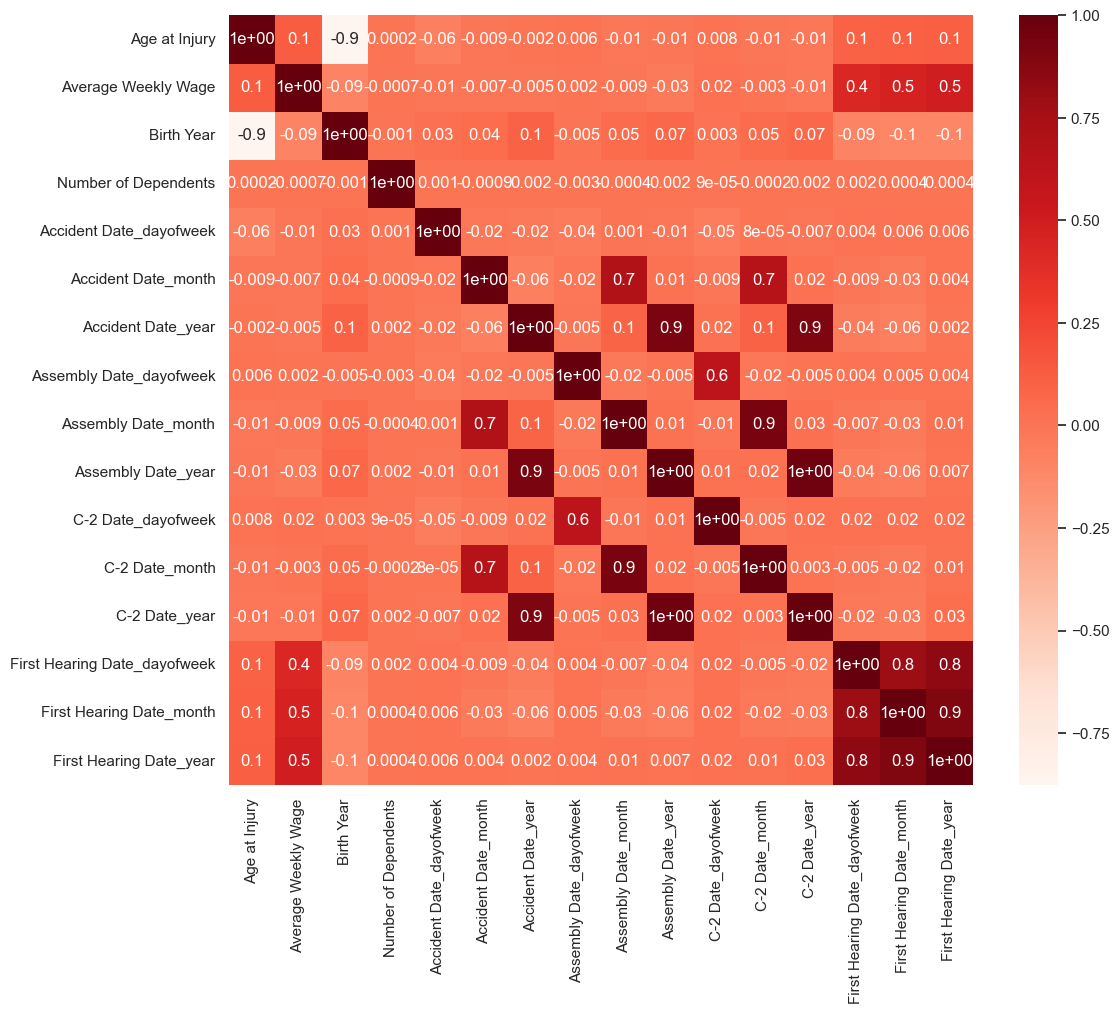

In [62]:
cor_heatmap(cor_spearman)

In [65]:
X_train_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_val_num_scaled.drop('Birth Year', axis=1, inplace=True)
X_test_num_scaled.drop('Birth Year', axis=1, inplace=True)

In [66]:
X_train_cat_df = pd.DataFrame(X_train_cat_lab, columns=X_train_cat.columns, index=X_train_cat.index)
X_val_cat_df = pd.DataFrame(X_val_cat_lab, columns=X_val_cat.columns, index=X_val_cat.index)
X_test_cat_df = pd.DataFrame(X_test_cat_lab, columns=X_test_cat.columns, index=X_test_cat.index)
X_train_cat.shape, X_train_num_scaled.shape

((401817, 18), (401817, 15))

In [67]:
X_train_combined = pd.concat([X_train_num_scaled, X_train_cat_df], axis=1)
X_val_combined = pd.concat([X_val_num_scaled, X_val_cat_df], axis=1)
X_test_combined = pd.concat([X_test_num_scaled, X_test_cat_df], axis=1)

In [70]:
y_train_series = pd.Series(y_train)

In [71]:
from scipy.stats import spearmanr

for col in X_train_combined.columns:
    spearman_corr, _ = spearmanr(X_train_combined[col], y_train_series)
    print(f"{col}: {spearman_corr:.4f}")

Age at Injury: 0.1161
Average Weekly Wage: 0.8245
Number of Dependents: -0.0012
Accident Date_dayofweek: -0.0137
Accident Date_month: -0.0111
Accident Date_year: -0.0307
Assembly Date_dayofweek: 0.0033
Assembly Date_month: -0.0196
Assembly Date_year: -0.0555
C-2 Date_dayofweek: 0.0337
C-2 Date_month: -0.0059
C-2 Date_year: -0.0366
First Hearing Date_dayofweek: 0.4505
First Hearing Date_month: 0.4876
First Hearing Date_year: 0.5179
Alternative Dispute Resolution: -0.0575
Attorney/Representative: 0.5707
Carrier Name: 0.0689
Carrier Type: 0.0500
County of Injury: 0.0057
COVID-19 Indicator: -0.0723
District Name: 0.0017
Gender: 0.0690
Industry Code: -0.0071
Industry Code Description: 0.0261
Medical Fee Region: 0.0440
WCIO Cause of Injury Code: -0.1068
WCIO Cause of Injury Description: -0.0189
WCIO Nature of Injury Code: -0.0423
WCIO Nature of Injury Description: 0.0128
WCIO Part Of Body Code: 0.0006
WCIO Part Of Body Description: 0.0149
Zip Code: 0.0115


In [69]:
important_features_corr = X_train_combined[['Age at Injury', 'Average Weekly Wage', 
                                           'Attorney/Representative', 'First Hearing Date_dayofweek', 
                                           'First Hearing Date_month', 'First Hearing Date_year']]

In [72]:
# Check indices of the dataframes
print(X_train_num_scaled.index)
print(X_train_cat_df.index)

Index([5935707, 5868764, 5986945, 5665055, 5595404, 5630873, 5467308, 6067767,
       5768696, 6159746,
       ...
       5581263, 6142160, 6001995, 5719575, 5866546, 5416700, 5904314, 5404181,
       5770532, 5904581],
      dtype='int64', name='Claim Identifier', length=401817)
Index([5935707, 5868764, 5986945, 5665055, 5595404, 5630873, 5467308, 6067767,
       5768696, 6159746,
       ...
       5581263, 6142160, 6001995, 5719575, 5866546, 5416700, 5904314, 5404181,
       5770532, 5904581],
      dtype='int64', name='Claim Identifier', length=401817)


In [73]:
# Reset the index of X_train_cat_df
#X_train_cat_df = X_train_cat_df.reset_index(drop=True)

In [74]:
X_train_combined.shape

(401817, 33)

In [75]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [76]:
reg = LassoCV()
reg.fit(X_train_combined, y_train)
coef = pd.Series(reg.coef_, index = X_train_combined.columns)
coef

Age at Injury                        0.000000
Average Weekly Wage                  0.000000
Number of Dependents                -0.000000
Accident Date_dayofweek             -0.000000
Accident Date_month                 -0.000000
Accident Date_year                  -0.000000
Assembly Date_dayofweek             -0.000000
Assembly Date_month                 -0.000000
Assembly Date_year                  -0.000000
C-2 Date_dayofweek                   0.000000
C-2 Date_month                      -0.000000
C-2 Date_year                       -0.000000
First Hearing Date_dayofweek         0.000000
First Hearing Date_month             0.000000
First Hearing Date_year              0.488864
Alternative Dispute Resolution      -0.000000
Attorney/Representative              0.922806
Carrier Name                         0.000064
Carrier Type                        -0.000000
County of Injury                     0.000288
COVID-19 Indicator                   0.000000
District Name                     

In [77]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 12 variables and eliminated the other 21 variables


In [78]:
coef.sort_values()

Medical Fee Region                  -0.008926
WCIO Nature of Injury Code          -0.005997
WCIO Cause of Injury Code           -0.004885
WCIO Part Of Body Description       -0.001210
WCIO Part Of Body Code              -0.000876
Age at Injury                        0.000000
Industry Code                        0.000000
Gender                               0.000000
District Name                       -0.000000
COVID-19 Indicator                   0.000000
Carrier Type                        -0.000000
Alternative Dispute Resolution      -0.000000
First Hearing Date_month             0.000000
Zip Code                            -0.000000
Accident Date_year                  -0.000000
Number of Dependents                -0.000000
Accident Date_dayofweek             -0.000000
Accident Date_month                 -0.000000
First Hearing Date_dayofweek         0.000000
Assembly Date_month                 -0.000000
Assembly Date_dayofweek             -0.000000
C-2 Date_dayofweek                

In [79]:
important_features_lasso = X_train_combined.loc[:, coef != 0]

In [80]:
features_selected = pd.concat([important_features_lasso, important_features_corr], axis=1)

In [81]:
X_train_combined_important_features = X_train_combined[features_selected.columns]
X_test_combined_important_features = X_test_combined[features_selected.columns]
X_val_combined_important_features = X_val_combined[features_selected.columns]

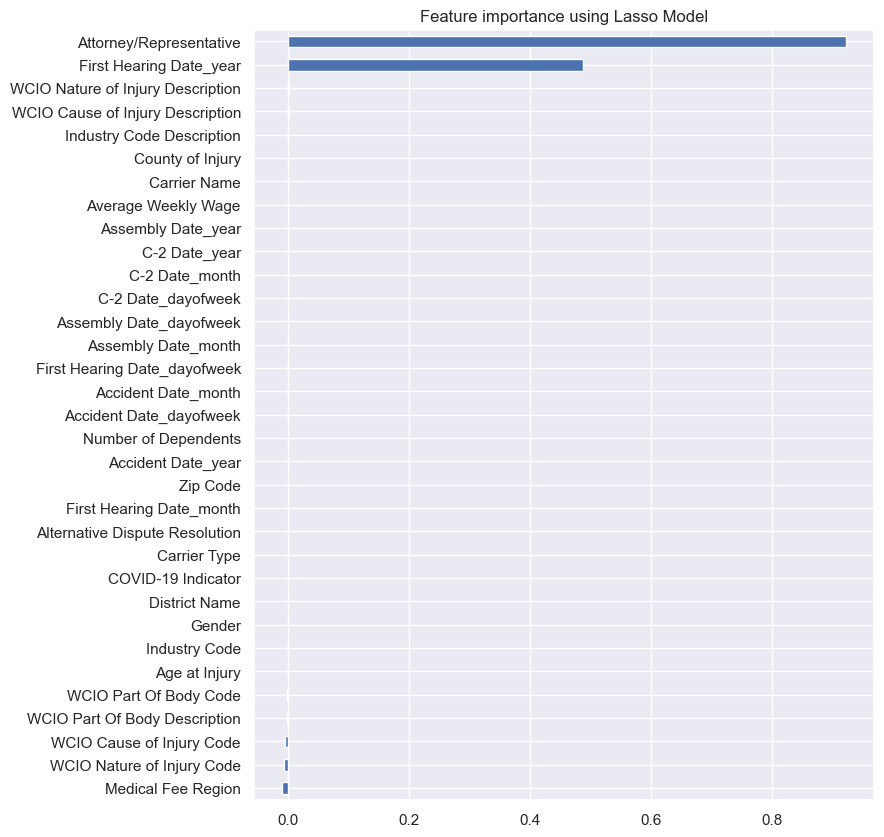

In [82]:
plot_importance(coef,'Lasso')

#### Balancing Data

In [83]:
pd.DataFrame(y_train).value_counts()

1    203754
3    103955
2     48234
4     33796
0      8733
5      2948
7       329
6        68
Name: count, dtype: int64

In [110]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_combined, y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Build a simple model and assess the performance

In [111]:
%pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier

def train_model(X_train, y_train, model_type='xgb', random_state=42):
    """Train model with multiple options"""
    print(f"\nTraining {model_type} model...")
    print(f"Starting training with {X_train.shape[1]} features...")
    
    if model_type == 'xgb':
        model = XGBClassifier(
            n_estimators=100,
            learning_rate=0.1,
            max_depth=6,
            random_state=random_state,
            n_jobs=2,
            tree_method='hist',
            enable_categorical=True,
            objective='multi:softprob',
            num_class=8,
            eval_metric=['mlogloss', 'merror'],
            use_label_encoder=False
        )
        
        # Train with early stopping
        eval_set = [(X_train, y_train)]
        model.fit(
            X_train, y_train,
            eval_set=eval_set,
            verbose=True
        )
        
    elif model_type == 'hist_gb':
        model = HistGradientBoostingClassifier(
            max_iter=100,
            learning_rate=0.1,
            max_depth=None,
            random_state=random_state,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    elif model_type == 'simple_rf':
        model = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            random_state=random_state,
            n_jobs=2,
            verbose=1
        )
        model.fit(X_train, y_train)
        
    else:
        raise ValueError(f"Unsupported model type: {model_type}")
    
    return model

Note: you may need to restart the kernel to use updated packages.


In [112]:
model = train_model(X_train_balanced, y_train_balanced)


Training xgb model...
Starting training with 33 features...


C:\Users\HP\anaconda3.1\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.82015	validation_0-merror:0.18327
[1]	validation_0-mlogloss:1.63378	validation_0-merror:0.17839
[2]	validation_0-mlogloss:1.48879	validation_0-merror:0.17881
[3]	validation_0-mlogloss:1.37036	validation_0-merror:0.17726
[4]	validation_0-mlogloss:1.27113	validation_0-merror:0.17496
[5]	validation_0-mlogloss:1.18708	validation_0-merror:0.17389
[6]	validation_0-mlogloss:1.11399	validation_0-merror:0.17297
[7]	validation_0-mlogloss:1.05051	validation_0-merror:0.17287
[8]	validation_0-mlogloss:0.99504	validation_0-merror:0.17242
[9]	validation_0-mlogloss:0.94457	validation_0-merror:0.17109
[10]	validation_0-mlogloss:0.90067	validation_0-merror:0.17071
[11]	validation_0-mlogloss:0.86104	validation_0-merror:0.16972
[12]	validation_0-mlogloss:0.82611	validation_0-merror:0.16918
[13]	validation_0-mlogloss:0.79448	validation_0-merror:0.16837
[14]	validation_0-mlogloss:0.76465	validation_0-merror:0.16753
[15]	validation_0-mlogloss:0.73884	validation_0-merror:0.16684
[1

In [113]:
print(model.score(X_train_balanced, y_train_balanced))
print(model.score(X_val_combined, y_val))

0.8593202676122166
0.782791740221128


In [114]:
CLAIM_TYPE_MAPPING = {
    1: '1. CANCELLED',
    2: '2. NON-COMP',
    3: '3. MED ONLY',
    4: '4. TEMPORARY',
    5: '5. PPD SCH LOSS',
    6: '6. PPD NSL',
    7: '7. PTD',
    8: '8. DEATH'
}

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def evaluate_model(model, X_val, y_val, X_test=None):
    y_val_pred = model.predict(X_val)
    
    val_metrics = {
        'accuracy': accuracy_score(y_val, y_val_pred),
        'f1_macro': f1_score(y_val, y_val_pred, average='macro')
    }
    
    print("\nValidation Results:")
    print("\nClassification Report:")
    print(classification_report(y_val, y_val_pred))
    print("\nMetrics:")
    for metric, value in val_metrics.items():
        print(f"{metric}: {value:.4f}")
    
    test_pred = None
    if X_test is not None:
        test_pred = model.predict(X_test)
    
    return val_metrics, test_pred
    
val_metrics, test_pred = evaluate_model(model, X_val_combined, y_val, X_test_combined)


Validation Results:

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.51      0.60      3743
           1       0.84      0.98      0.91     87324
           2       0.50      0.06      0.10     20672
           3       0.71      0.86      0.78     44552
           4       0.67      0.55      0.61     14484
           5       0.33      0.00      0.00      1263
           6       0.01      0.03      0.01        29
           7       0.38      0.04      0.08       141

    accuracy                           0.78    172208
   macro avg       0.52      0.38      0.39    172208
weighted avg       0.75      0.78      0.74    172208


Metrics:
accuracy: 0.7828
f1_macro: 0.3854


In [116]:
def create_submission_df(predictions, test_df):
    # Add 1 to predictions to convert back to original scale (0-7 to 1-8)
    numeric_predictions = predictions + 1
    
    # Map numeric predictions to claim type strings
    claim_types = [CLAIM_TYPE_MAPPING[pred] for pred in numeric_predictions]
    
    # Create submission dataframe using original (unscaled) claim identifiers
    submission = pd.DataFrame({
        'Claim Identifier': test_df['Claim Identifier'].astype(int),  # Original claim IDs
        'Claim Injury Type': claim_types  # Full claim type names
    })
    
    return submission

In [117]:
def save_submission(submission_df, experiment_name):
    filename = f'submission_{experiment_name}.csv'
    submission_df.to_csv(filename, index=False)
    print(f"\nSubmission saved to {filename}")
    
    # Display sample of submission
    print("\nSubmission sample:")
    print(submission_df.head())
    print("\nValue counts:")
    print(submission_df['Claim Injury Type'].value_counts())

In [118]:
model_1 = 'Model 1'
original_claim_ids = X_test_combined.index.copy()
submission_df = create_submission_df(test_pred, pd.DataFrame({'Claim Identifier': original_claim_ids}))
save_submission(submission_df, model_1)


Submission saved to submission_Model 1.csv

Submission sample:
   Claim Identifier Claim Injury Type
0           6165911       2. NON-COMP
1           6166141       2. NON-COMP
2           6165907       2. NON-COMP
3           6166047       2. NON-COMP
4           6166102       2. NON-COMP

Value counts:
Claim Injury Type
2. NON-COMP        314195
4. TEMPORARY        47497
3. MED ONLY         16323
1. CANCELLED         6566
5. PPD SCH LOSS      3380
8. DEATH               14
Name: count, dtype: int64
